#https://wwwn.cdc.gov/Nchs/Nhanes/Search/variablelist.aspx?Component=Questionnaire&CycleBeginYear=2013
##The variable dictionary to understand the code at the top of each column. 

In [73]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas.io.json import json_normalize 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from scipy.stats import t
from numpy.random import seed

import re
import sklearn
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [74]:
data = pd.read_csv('/Users/Sandi/Desktop/Projects/Capstone_2/questionnaire.csv')
demographics = pd.read_csv('/Users/Sandi/Desktop/Projects/Capstone_2/demographic.csv')
labs = pd.read_csv('/Users/Sandi/Desktop/Projects/Capstone_2/labs.csv')

**Data Set Merge and Select Attribute**

In [75]:
data.drop(['SEQN'], axis = 1, inplace=True)
demographics.drop(['SEQN'], axis = 1, inplace=True)
labs.drop(['SEQN'], axis = 1, inplace=True)
#https://www.kaggle.com/what0919/diabetes-prediction

In [76]:
df = pd.concat([data, demographics], axis=1, join='inner')
df = pd.concat([df, labs], axis=1, join='inner')
#merge

In [77]:
df.head()

,ACD011A,ACD011B,ACD011C,ACD040,ACD110,ALQ101,ALQ110,ALQ120Q,ALQ120U,ALQ130,...,URXUTL,URDUTLLC,URXUTU,URDUTULC,URXUUR,URDUURLC,URXPREG,URXUAS,LBDB12,LBDB12SI
0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524.0,386.7
1,1.0,NaN,NaN,NaN,NaN,1.0,NaN,7.0,1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.0,374.2
2,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732.0,540.2
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.062,0.0,0.238,0.0,0.0071,0.0,NaN,3.83,NaN,NaN
4,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,166.1


**NaN Handling and Feature Column Selection**

In [78]:
from sklearn.feature_selection import VarianceThreshold

df = df.rename(columns = {'SEQN' : 'ID',
                          'RIAGENDR' : 'Gender',
                          'RIDAGEYR' : 'AgeAtSurvey', 
                          'WHD120' : 'WeightAt25Yrs', 
                          'WHD130' : 'HeightAt25Yrs',
                          'LBXPLTSI' : 'PlateletCount',
                          'LBXSCK' : 'CreatinePhosphokinase',
                          'MCQ160A' : 'HasArthritis',
                          'MCQ010' : 'HasAsthma',
                          'CSQ204' : 'AllergyCongestionPast12Months',
                          'DBQ010' : 'Breast_fed',
                          'DBQ229' : 'UseMilk>=5x/wk',
                          'DBQ235B' : 'DrankMilkAge13to17yrs',
                          'DBQ235C' : 'DrankMilkAge18to35yrs',
                          'PUQ100' : 'ChemicalPesticideUsedInHomePast7days',
                          'PUQ110' : 'ChemicalWeedKillUsedExteriorHomePast7days',
                          'PAQ610' : 'NumberOfDays/WeekVigorousWork',
                          'PAD615' : 'Minutes/DayVigorousIntensityWork',
                          'PAQ625' : 'NumberOfDays/WeekModerateWork',
                          'PAD630' : 'Minutes/DayModerateIntensityWork',
                          'PAQ635' : 'WalkOrBicycle10+Min/weekYN',
                          'PAQ640' : 'NumberDays/WeekWalkBicycle',
                          'PAD645' : 'Minutes/DayWalkBicycleTransportation',
                          'PAQ650' : 'VigorousRecreationalActivities10+min/WeekYN',
                          'PAQ655' : 'Days/WeekVigorousRecreationalActivities',
                          'PAD660' : 'Minutes/DayVigorousRecreationalActivities',
                          'PAQ665' : 'ModerateRecreationalActivities10+min/WeekYN',
                          'PAQ670' : 'Days/WeekModerateRecreationalActivities',
                          'PAD675' : 'Minutes/DayModerateRecreationalActivities',
                          'PAD680' : 'Minutes/DaySedentaryActivity'})

df = df.loc[:, ['ID', 'Gender', 'AgeAtSurvey', 'WeightAt25Yrs', 'HeightAt25Yrs','PlateletCount', 'CreatinePhosphokinase', 
                'HasArthritis', 'HasAsthma', 'AllergyCongestionPast12Months', 'Breast_fed', 'UseMilk>=5x/wk', 
                'DrankMilkAge13to17yrs', 'DrankMilkAge18to35yrs', 'ChemicalPesticideUsedInHomePast7days', 'ChemicalWeedKillUsedExteriorHomePast7days',
                'NumberOfDays/WeekVigorousWork', 'Minutes/DayVigorousIntensityWork',  
                'NumberOfDays/WeekModerateWork', 'Minutes/DayModerateIntensityWork', 
                'WalkOrBicycle10+Min/weekYN', 'NumberDays/WeekWalkBicycle',
                'Minutes/DayWalkBicycleTransportation', 'VigorousRecreationalActivities10+min/WeekYN', 
                'Days/WeekVigorousRecreationalActivities',
                'Minutes/DayVigorousRecreationalActivities', 'ModerateRecreationalActivities10+min/WeekYN', 
                'Days/WeekModerateRecreationalActivities',
                'Minutes/DayModerateRecreationalActivities', 'Minutes/DaySedentaryActivity']]

#'PAQ677' : 'Past7DaysCardio20Minutes+','PAQ678' : 'Past7DaysStrengthTone20Minutes+', 'PAQ706' : 'Past7DaysCardio60Minutes+'


In [79]:
total = df.isnull().sum().sort_values(ascending = True)
percent = (df.isnull().sum() / df.isnull().count() * 100).sort_values(ascending = True)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total','Percent'])
missing_data

,Total,Percent
Gender,0,0.000000
AgeAtSurvey,0,0.000000
HasAsthma,391,3.984510
PlateletCount,1269,12.931825
ChemicalPesticideUsedInHomePast7days,2281,23.244675
ChemicalWeedKillUsedExteriorHomePast7days,2282,23.254866
VigorousRecreationalActivities10+min/WeekYN,2925,29.807398
WalkOrBicycle10+Min/weekYN,2925,29.807398
ModerateRecreationalActivities10+min/WeekYN,2927,29.827779
Minutes/DaySedentaryActivity,2933,29.888923


In [80]:
df['HasAsthma'].value_counts()

2.0    7933
1.0    1480
9.0       8
7.0       1
Name: HasAsthma, dtype: int64

**Feature Generation**
new column should be created for BMI.  
#The formula is BMI = kg/m2 where kg is a person’s weight in kilograms and m2 is their height in meters squared.
'WeightAt25Yrs' in kg divided by the 'HeightAt25Yrs' in meters squared.  

In [81]:
df.insert(4, 'BMI', df['WeightAt25Yrs']/ (df['WeightAt25Yrs']**2), True)
#need to check the units for weight and height.
#https://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/WHQ_H.htm#Component_Description
#English Instructions:
    #ENTER HEIGHT IN FEET AND INCHES OR METERS AND CENTIMETERS.
    #RECORD CURRENT WEIGHT. ENTER WEIGHT IN POUNDS OR KILOGRAMS. 
    #IF PREGNANT, ASK FOR WEIGHT BEFORE PREGNANCY. 

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Data columns (total 31 columns):
ID                                             0 non-null float64
Gender                                         9813 non-null int64
AgeAtSurvey                                    9813 non-null int64
WeightAt25Yrs                                  4842 non-null float64
BMI                                            4842 non-null float64
HeightAt25Yrs                                  2667 non-null float64
PlateletCount                                  8544 non-null float64
CreatinePhosphokinase                          6542 non-null float64
HasArthritis                                   5561 non-null float64
HasAsthma                                      9422 non-null float64
AllergyCongestionPast12Months                  3680 non-null float64
Breast_fed                                     1803 non-null float64
UseMilk>=5x/wk                                 5561 non-null float64
Dra

**Question:
What types of correlations can be found amongst the data?**

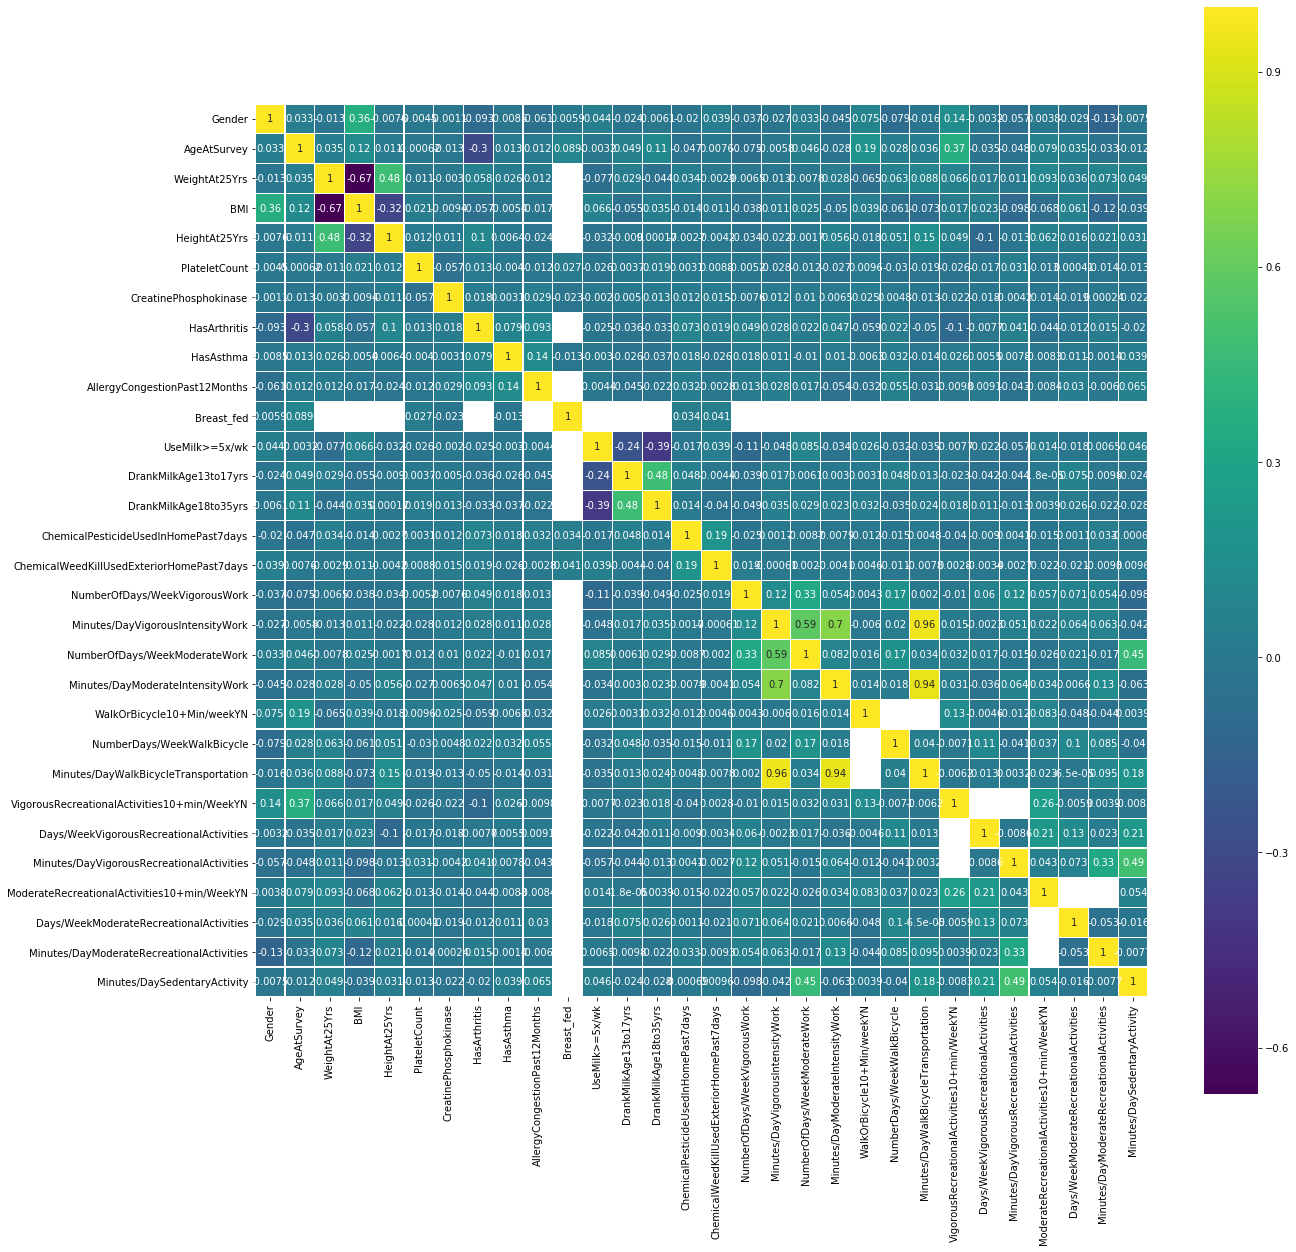

In [83]:
colormap = plt.cm.viridis
plt.figure(figsize=(20,20))
sns.heatmap(df.astype(float).drop(axis=1, labels='ID').corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)

**Question:  Is there a correlation with those who reported having been told they had arthritis, and their blood counts?**
#When arthritis = 1.0, report the Creatine Phosphokinase.  


In [84]:
#https://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/MCQ_H.htm#MCQ160a
df['HasArthritis'].value_counts()
#those marked as 1.0 said yes that a doctor or health pro told them they had arthritis

2.0    4093
1.0    1455
9.0      13
Name: HasArthritis, dtype: int64

In [85]:
arthritis_bc_yes = df.loc[(df['HasArthritis'] == 1), ['CreatinePhosphokinase', 'PlateletCount']]
arthritis_bc_yes.head(10)

,CreatinePhosphokinase,PlateletCount
0,174.0,204.0
4,60.0,300.0
5,340.0,249.0
7,120.0,180.0
9,220.0,187.0
50,NaN,221.0
56,88.0,243.0
58,NaN,294.0
59,67.0,196.0
61,NaN,370.0


In [86]:
arthritis_bc = arthritis_bc_yes.dropna()
#Eliminate NaN values, drop those rows.
#dropna
arthritis_bc.head(10)

,CreatinePhosphokinase,PlateletCount
0,174.0,204.0
4,60.0,300.0
5,340.0,249.0
7,120.0,180.0
9,220.0,187.0
56,88.0,243.0
59,67.0,196.0
69,128.0,334.0
71,80.0,182.0
81,142.0,267.0


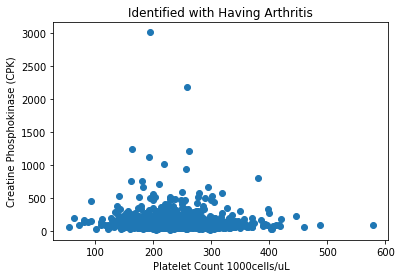

In [87]:
_ = plt.scatter(arthritis_bc['PlateletCount'], arthritis_bc['CreatinePhosphokinase'])

_ = plt.xlabel('Platelet Count 1000cells/uL')
_ = plt.ylabel('Creatine Phosphokinase (CPK)')
_ = plt.title('Identified with Having Arthritis')  
#Add cross hairs?

**Answer:**  
The scatterplot shows most participants identified with arthritis are in the lower left quadrant, which indicates lower platelet and CPK counts.  Based on this visual alone, a hyphotheses statement such that a participant with low levels of CPK and low platelet counts have a good chance of being told by a health professional that they have arthritis.
Further, there are no participants in the upper right quadrant, which suggests that higher counts for both CPK and platelets relates to those not being diagnosed with arthritis.
There are definitley a few outliers in the upper left quadrant that are not significant and would not be included when making generalizations.  
There are more outliers in the lower right quadrant, perhaps significant enough to look further into whether the higher platelet counts play a role in diagnosing possible arthritis.

In general, high CPK levels in the muscle suggest the presence of inflammatory muscle disease, but they can also be caused by trauma, injection into the muscle, or muscle disease due to hypothyroidism. Conversely, low levels of CPK can be indicative of rheumatoid arthritis.
https://www.arthritis-health.com/glossary/creatine-phosphokinase

**Question:  Examining participants who have been diagnosed with asthma.  Can machine learning help in predicting asthma in people based on certain factors?**


**Machine Learning**

Below are studies to look at classification techniques common in Machine Learning. It is interesting to look at what clustering analysis and machine learning prediction will show.
Look at those who have been identified as having asthma, connecting to their data.**


In [88]:
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.model_selection import KFold
#from sklearn.cross_validation import KFold;
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn import datasets
from sklearn import svm

In [89]:
asthma_all = df.loc[:,
['AgeAtSurvey', 'PlateletCount', 'CreatinePhosphokinase', 'ChemicalPesticideUsedInHomePast7days', 
 'ChemicalWeedKillUsedExteriorHomePast7days',
 'VigorousRecreationalActivities10+min/WeekYN','WalkOrBicycle10+Min/weekYN',
 'ModerateRecreationalActivities10+min/WeekYN','Minutes/DaySedentaryActivity', 'UseMilk>=5x/wk', 
  'BMI', 'WeightAt25Yrs', 'HasArthritis', 'HasAsthma']]

In [90]:
colnames_list = ['AgeAtSurvey', 'PlateletCount', 'CreatinePhosphokinase', 'ChemicalPesticideUsedInHomePast7days', 
 'ChemicalWeedKillUsedExteriorHomePast7days',
 'VigorousRecreationalActivities10+min/WeekYN','WalkOrBicycle10+Min/weekYN',
 'ModerateRecreationalActivities10+min/WeekYN','Minutes/DaySedentaryActivity', 'UseMilk>=5x/wk', 
  'BMI', 'WeightAt25Yrs', 'HasArthritis', 'HasAsthma']

In [91]:
#Normalize data (length of 1)
# Create x, where x the 'scores' column's values as floats
x_normalize = asthma_all.values.astype(float)
# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()
# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x_normalize)
# Run the normalizer on the dataframe
asthma_all_normalized = pd.DataFrame(x_scaled)

#will put all values into 0-1
#then explanations of high and low rather than exact numbers

In [92]:
#replace column names
asthma_all_normalized.columns = colnames_list

In [93]:
asthma_all_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Data columns (total 14 columns):
AgeAtSurvey                                    9813 non-null float64
PlateletCount                                  8544 non-null float64
CreatinePhosphokinase                          6542 non-null float64
ChemicalPesticideUsedInHomePast7days           7532 non-null float64
ChemicalWeedKillUsedExteriorHomePast7days      7531 non-null float64
VigorousRecreationalActivities10+min/WeekYN    6888 non-null float64
WalkOrBicycle10+Min/weekYN                     6888 non-null float64
ModerateRecreationalActivities10+min/WeekYN    6886 non-null float64
Minutes/DaySedentaryActivity                   6880 non-null float64
UseMilk>=5x/wk                                 5561 non-null float64
BMI                                            4842 non-null float64
WeightAt25Yrs                                  4842 non-null float64
HasArthritis                                   5561 non-null floa

In [94]:
total = asthma_all_normalized.isnull().sum().sort_values(ascending = True)
percent = (asthma_all_normalized.isnull().sum() / asthma_all_normalized.isnull().count() * 100).sort_values(ascending = True)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total','Percent'])
missing_data
#how many columns percentage of null values to drop them in the beginning.

,Total,Percent
AgeAtSurvey,0,0.000000
HasAsthma,391,3.984510
PlateletCount,1269,12.931825
ChemicalPesticideUsedInHomePast7days,2281,23.244675
ChemicalWeedKillUsedExteriorHomePast7days,2282,23.254866
VigorousRecreationalActivities10+min/WeekYN,2925,29.807398
WalkOrBicycle10+Min/weekYN,2925,29.807398
ModerateRecreationalActivities10+min/WeekYN,2927,29.827779
Minutes/DaySedentaryActivity,2933,29.888923
CreatinePhosphokinase,3271,33.333333


In [95]:
asthma_clean = asthma_all_normalized.dropna()
asthma_clean.head()

,AgeAtSurvey,PlateletCount,CreatinePhosphokinase,ChemicalPesticideUsedInHomePast7days,ChemicalWeedKillUsedExteriorHomePast7days,VigorousRecreationalActivities10+min/WeekYN,WalkOrBicycle10+Min/weekYN,ModerateRecreationalActivities10+min/WeekYN,Minutes/DaySedentaryActivity,UseMilk>=5x/wk,BMI,WeightAt25Yrs,HasArthritis,HasAsthma
0,0.8625,0.263830,0.042424,0.125,0.125,0.125,0.125,0.125,0.060006,0.125,0.270990,0.014582,0.000,0.125
1,0.6750,0.419858,0.035606,0.125,0.125,0.125,0.125,0.125,0.054005,0.000,0.215686,0.019610,0.125,0.000
2,0.9000,0.310638,0.009596,0.000,0.125,0.125,0.125,0.000,0.030003,0.000,0.285544,0.013576,0.125,0.125
4,0.9125,0.400000,0.013636,0.125,0.125,0.125,0.125,0.125,0.048005,0.000,0.404130,0.008045,0.000,0.125
5,0.7000,0.327660,0.084343,0.000,0.125,0.125,0.125,0.125,0.036004,0.250,0.278080,0.014079,0.000,0.125


In [96]:
asthma_clean['HasAsthma'].value_counts()
#this shows you need to revert HasAsthma back to original

0.125    2392
0.000     432
1.000       2
Name: HasAsthma, dtype: int64

In [97]:
class2 = asthma_clean['HasAsthma'] == 0.125
asthma_clean['HasAsthma'][class2] = 2
class1 = asthma_clean['HasAsthma'] == 0.000
asthma_clean['HasAsthma'][class1] = 1
asthma_clean['HasAsthma'] = asthma_clean['HasAsthma'].astype(int)
asthma_clean['HasAsthma'].head()

0    2
1    1
2    2
4    2
5    2
Name: HasAsthma, dtype: int64

In [98]:
#split dataset in features and target variable
#need to drop the HasAsthma here, so the x now has none
colnames_list_noclass = ['AgeAtSurvey', 'PlateletCount', 'CreatinePhosphokinase', 'ChemicalPesticideUsedInHomePast7days', 
 'ChemicalWeedKillUsedExteriorHomePast7days',
 'VigorousRecreationalActivities10+min/WeekYN','WalkOrBicycle10+Min/weekYN',
 'ModerateRecreationalActivities10+min/WeekYN','Minutes/DaySedentaryActivity', 'UseMilk>=5x/wk', 
  'BMI', 'WeightAt25Yrs', 'HasArthritis']
X = asthma_clean[colnames_list_noclass]
y = asthma_clean['HasAsthma']
##

In [99]:
X.head()

,AgeAtSurvey,PlateletCount,CreatinePhosphokinase,ChemicalPesticideUsedInHomePast7days,ChemicalWeedKillUsedExteriorHomePast7days,VigorousRecreationalActivities10+min/WeekYN,WalkOrBicycle10+Min/weekYN,ModerateRecreationalActivities10+min/WeekYN,Minutes/DaySedentaryActivity,UseMilk>=5x/wk,BMI,WeightAt25Yrs,HasArthritis
0,0.8625,0.263830,0.042424,0.125,0.125,0.125,0.125,0.125,0.060006,0.125,0.270990,0.014582,0.000
1,0.6750,0.419858,0.035606,0.125,0.125,0.125,0.125,0.125,0.054005,0.000,0.215686,0.019610,0.125
2,0.9000,0.310638,0.009596,0.000,0.125,0.125,0.125,0.000,0.030003,0.000,0.285544,0.013576,0.125
4,0.9125,0.400000,0.013636,0.125,0.125,0.125,0.125,0.125,0.048005,0.000,0.404130,0.008045,0.000
5,0.7000,0.327660,0.084343,0.000,0.125,0.125,0.125,0.125,0.036004,0.250,0.278080,0.014079,0.000


In [100]:
y.head()

0    2
1    1
2    2
4    2
5    2
Name: HasAsthma, dtype: int64

In [101]:
#y = y.astype('int')
#https://stackoverflow.com/questions/45346550/valueerror-unknown-label-type-unknown
#Your y is of type object, so sklearn cannot recognize its type.

In [102]:
y.count()

2826

In [103]:
X.count()

AgeAtSurvey                                    2826
PlateletCount                                  2826
CreatinePhosphokinase                          2826
ChemicalPesticideUsedInHomePast7days           2826
ChemicalWeedKillUsedExteriorHomePast7days      2826
VigorousRecreationalActivities10+min/WeekYN    2826
WalkOrBicycle10+Min/weekYN                     2826
ModerateRecreationalActivities10+min/WeekYN    2826
Minutes/DaySedentaryActivity                   2826
UseMilk>=5x/wk                                 2826
BMI                                            2826
WeightAt25Yrs                                  2826
HasArthritis                                   2826
dtype: int64

In [104]:
asthma_clean = X.copy()
asthma_clean['HasAsthma'] = y
asthma_clean.head()
#use of copy  https://docs.python.org/3/library/copy.html

,AgeAtSurvey,PlateletCount,CreatinePhosphokinase,ChemicalPesticideUsedInHomePast7days,ChemicalWeedKillUsedExteriorHomePast7days,VigorousRecreationalActivities10+min/WeekYN,WalkOrBicycle10+Min/weekYN,ModerateRecreationalActivities10+min/WeekYN,Minutes/DaySedentaryActivity,UseMilk>=5x/wk,BMI,WeightAt25Yrs,HasArthritis,HasAsthma
0,0.8625,0.263830,0.042424,0.125,0.125,0.125,0.125,0.125,0.060006,0.125,0.270990,0.014582,0.000,2
1,0.6750,0.419858,0.035606,0.125,0.125,0.125,0.125,0.125,0.054005,0.000,0.215686,0.019610,0.125,1
2,0.9000,0.310638,0.009596,0.000,0.125,0.125,0.125,0.000,0.030003,0.000,0.285544,0.013576,0.125,2
4,0.9125,0.400000,0.013636,0.125,0.125,0.125,0.125,0.125,0.048005,0.000,0.404130,0.008045,0.000,2
5,0.7000,0.327660,0.084343,0.000,0.125,0.125,0.125,0.125,0.036004,0.250,0.278080,0.014079,0.000,2


In [105]:
HasAsthma_yes = asthma_clean[asthma_clean['HasAsthma'] == 1]
HasAsthma_yes.head()
HasAsthma_other= asthma_clean[asthma_clean['HasAsthma'] == 2] 
##

In [106]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2826 entries, 0 to 9805
Data columns (total 13 columns):
AgeAtSurvey                                    2826 non-null float64
PlateletCount                                  2826 non-null float64
CreatinePhosphokinase                          2826 non-null float64
ChemicalPesticideUsedInHomePast7days           2826 non-null float64
ChemicalWeedKillUsedExteriorHomePast7days      2826 non-null float64
VigorousRecreationalActivities10+min/WeekYN    2826 non-null float64
WalkOrBicycle10+Min/weekYN                     2826 non-null float64
ModerateRecreationalActivities10+min/WeekYN    2826 non-null float64
Minutes/DaySedentaryActivity                   2826 non-null float64
UseMilk>=5x/wk                                 2826 non-null float64
BMI                                            2826 non-null float64
WeightAt25Yrs                                  2826 non-null float64
HasArthritis                                   2826 non-null floa

In [107]:
HasAsthma_yes.head()

,AgeAtSurvey,PlateletCount,CreatinePhosphokinase,ChemicalPesticideUsedInHomePast7days,ChemicalWeedKillUsedExteriorHomePast7days,VigorousRecreationalActivities10+min/WeekYN,WalkOrBicycle10+Min/weekYN,ModerateRecreationalActivities10+min/WeekYN,Minutes/DaySedentaryActivity,UseMilk>=5x/wk,BMI,WeightAt25Yrs,HasArthritis,HasAsthma
1,0.6750,0.419858,0.035606,0.125,0.125,0.125,0.125,0.125,0.054005,0.000,0.215686,0.019610,0.125,1
7,0.7625,0.229787,0.028788,0.125,0.125,0.125,0.125,0.125,0.006001,0.125,0.429935,0.007241,0.000,1
39,0.7125,0.231206,0.037626,0.125,0.125,0.125,0.125,0.000,0.060006,0.125,0.419886,0.007542,0.125,1
81,0.7875,0.353191,0.034343,0.125,0.125,0.125,0.125,0.125,0.018002,0.125,0.319788,0.011565,0.000,1
108,0.7375,0.343262,0.022727,0.125,0.125,0.125,0.000,0.125,0.072007,0.250,0.319788,0.011565,0.125,1


In [108]:
HasAsthma_other.head()

,AgeAtSurvey,PlateletCount,CreatinePhosphokinase,ChemicalPesticideUsedInHomePast7days,ChemicalWeedKillUsedExteriorHomePast7days,VigorousRecreationalActivities10+min/WeekYN,WalkOrBicycle10+Min/weekYN,ModerateRecreationalActivities10+min/WeekYN,Minutes/DaySedentaryActivity,UseMilk>=5x/wk,BMI,WeightAt25Yrs,HasArthritis,HasAsthma
0,0.8625,0.263830,0.042424,0.125,0.125,0.125,0.125,0.125,0.060006,0.125,0.270990,0.014582,0.000,2
2,0.9000,0.310638,0.009596,0.000,0.125,0.125,0.125,0.000,0.030003,0.000,0.285544,0.013576,0.125,2
4,0.9125,0.400000,0.013636,0.125,0.125,0.125,0.125,0.125,0.048005,0.000,0.404130,0.008045,0.000,2
5,0.7000,0.327660,0.084343,0.000,0.125,0.125,0.125,0.125,0.036004,0.250,0.278080,0.014079,0.000,2
9,0.7000,0.239716,0.054040,0.125,0.125,0.125,0.125,0.125,0.003000,0.000,0.455337,0.006537,0.000,2


In [109]:
asthma_clean.head()

,AgeAtSurvey,PlateletCount,CreatinePhosphokinase,ChemicalPesticideUsedInHomePast7days,ChemicalWeedKillUsedExteriorHomePast7days,VigorousRecreationalActivities10+min/WeekYN,WalkOrBicycle10+Min/weekYN,ModerateRecreationalActivities10+min/WeekYN,Minutes/DaySedentaryActivity,UseMilk>=5x/wk,BMI,WeightAt25Yrs,HasArthritis,HasAsthma
0,0.8625,0.263830,0.042424,0.125,0.125,0.125,0.125,0.125,0.060006,0.125,0.270990,0.014582,0.000,2
1,0.6750,0.419858,0.035606,0.125,0.125,0.125,0.125,0.125,0.054005,0.000,0.215686,0.019610,0.125,1
2,0.9000,0.310638,0.009596,0.000,0.125,0.125,0.125,0.000,0.030003,0.000,0.285544,0.013576,0.125,2
4,0.9125,0.400000,0.013636,0.125,0.125,0.125,0.125,0.125,0.048005,0.000,0.404130,0.008045,0.000,2
5,0.7000,0.327660,0.084343,0.000,0.125,0.125,0.125,0.125,0.036004,0.250,0.278080,0.014079,0.000,2


In [110]:
X.head()

,AgeAtSurvey,PlateletCount,CreatinePhosphokinase,ChemicalPesticideUsedInHomePast7days,ChemicalWeedKillUsedExteriorHomePast7days,VigorousRecreationalActivities10+min/WeekYN,WalkOrBicycle10+Min/weekYN,ModerateRecreationalActivities10+min/WeekYN,Minutes/DaySedentaryActivity,UseMilk>=5x/wk,BMI,WeightAt25Yrs,HasArthritis
0,0.8625,0.263830,0.042424,0.125,0.125,0.125,0.125,0.125,0.060006,0.125,0.270990,0.014582,0.000
1,0.6750,0.419858,0.035606,0.125,0.125,0.125,0.125,0.125,0.054005,0.000,0.215686,0.019610,0.125
2,0.9000,0.310638,0.009596,0.000,0.125,0.125,0.125,0.000,0.030003,0.000,0.285544,0.013576,0.125
4,0.9125,0.400000,0.013636,0.125,0.125,0.125,0.125,0.125,0.048005,0.000,0.404130,0.008045,0.000
5,0.7000,0.327660,0.084343,0.000,0.125,0.125,0.125,0.125,0.036004,0.250,0.278080,0.014079,0.000


In [111]:
length_HasAsthma_yes=len(HasAsthma_yes)
length_HasAsthma_other=len(HasAsthma_other)
random_index= np.random.randint(0, length_HasAsthma_other, size=(1,length_HasAsthma_yes))
random_index[0]
HasAsthma_other = HasAsthma_other.iloc[random_index[0]]
HasAsthma_new= pd.concat([HasAsthma_other, HasAsthma_yes])
HasAsthma_new.head(5)
##results in equal no and yes.

,AgeAtSurvey,PlateletCount,CreatinePhosphokinase,ChemicalPesticideUsedInHomePast7days,ChemicalWeedKillUsedExteriorHomePast7days,VigorousRecreationalActivities10+min/WeekYN,WalkOrBicycle10+Min/weekYN,ModerateRecreationalActivities10+min/WeekYN,Minutes/DaySedentaryActivity,UseMilk>=5x/wk,BMI,WeightAt25Yrs,HasArthritis,HasAsthma
311,0.4000,0.293617,0.046212,0.125,0.000,0.125,0.000,0.000,0.042004,0.250,0.285544,0.013576,0.125,2
4334,0.6875,0.304965,0.038384,0.125,0.125,0.125,0.125,0.125,0.012001,0.125,0.436903,0.007039,0.000,2
6542,1.0000,0.539007,0.082323,0.125,0.000,0.125,0.125,0.125,0.048005,0.000,0.329646,0.011062,0.000,2
1237,0.4750,0.344681,0.073485,0.125,0.125,0.000,0.125,0.000,0.030003,0.250,0.270990,0.014582,0.125,2
5423,0.8500,0.449645,0.017172,0.125,0.125,0.125,0.125,0.125,0.030003,0.000,0.497235,0.005531,0.000,2


In [112]:
HasAsthma_new['HasAsthma'].value_counts()

2    434
1    434
Name: HasAsthma, dtype: int64

In [113]:
X = HasAsthma_new[colnames_list_noclass]
y = HasAsthma_new['HasAsthma']

In [114]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
#Dataset is broken into two parts in a ratio of 75:25. 
#75% data will be used for model training and 25% for model testing.

In [115]:
X_train.size

8463

In [116]:
X_test.size

2821

In [117]:
y_train.size

651

In [118]:
y_test.size

217

In [119]:
# import the class
from sklearn.linear_model import LogisticRegression

In [120]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=1000)

In [121]:
#https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/
# Import label encoder
from sklearn import preprocessing


# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

In [122]:
# fit the model with data
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [123]:
y_pred=logreg.predict(X_test)

In [124]:
# import the metrics class
from sklearn import metrics

In [125]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[71, 37],
       [55, 54]])

In [126]:
classification_accuracy = metrics.accuracy_score(y_test, y_pred)
classification_accuracy

0.576036866359447

In [127]:
import seaborn as sns

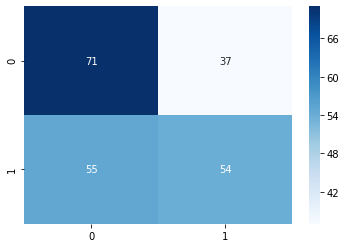

In [128]:
sns.heatmap(cnf_matrix, annot = True, fmt = 'g', cmap = 'Blues')
#Visualize the confusion matrix using a heatmap

In [129]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
#https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

Accuracy: 0.576036866359447
Precision: 0.5634920634920635
Recall: 0.6574074074074074


**Visualize the confusion matrix using a heatmap.**The classification rate is around 55%, which is a good
Accuracy in that it is more than 50%.  The precision, or how often the model is correct, predicts if people with certain habits or bloodwork will or will not get asthma 85% of the time. If there are
people that will or will not get asthma, the Logistic Regression model can identify it 57.4% of
the time.  There are two classes here; the person will get asthma or the person will not get asthma.   The classifier made a total of 217 predictions.  
The prediction showed “yes” 103 times, and “no” 114 times.


In [130]:
#https://heartbeat.fritz.ai/k-means-clustering-using-sklearn-and-python-4a054d67b187
from sklearn.cluster import KMeans

In [131]:
#hide hasasthma for the kmeans
HasAsthma_new[colnames_list].drop(['HasAsthma'], axis = 1, inplace=True)

In [132]:
HasAsthma_new.columns

Index(['AgeAtSurvey', 'PlateletCount', 'CreatinePhosphokinase',
       'ChemicalPesticideUsedInHomePast7days',
       'ChemicalWeedKillUsedExteriorHomePast7days',
       'VigorousRecreationalActivities10+min/WeekYN',
       'WalkOrBicycle10+Min/weekYN',
       'ModerateRecreationalActivities10+min/WeekYN',
       'Minutes/DaySedentaryActivity', 'UseMilk>=5x/wk', 'BMI',
       'WeightAt25Yrs', 'HasArthritis', 'HasAsthma'],
      dtype='object')

In [133]:
 #HasAsthma_yes
    #HasAsthma_new
    #asthma_clean[feature_cols]
    #asthma_clean['HasAsthma']
#x = asthma_clean[feature_cols].iloc[:, [2,3,9,10]].values
#x = HasAsthma_new.iloc[:, :].values
#x = asthma_clean[colnames_list] .iloc[:, :].values
x = HasAsthma_new[colnames_list_noclass] .iloc[:, :].values

In [134]:
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)
#find the 5 clusters formed from the data
kmeans5.cluster_centers_

[3 0 2 3 2 3 2 0 2 2 0 3 3 3 0 1 0 3 2 2 3 0 2 0 2 0 0 3 2 2 0 2 3 3 2 3 3
 0 3 0 0 2 2 3 3 3 2 0 2 0 1 0 1 2 2 2 2 3 3 3 2 0 3 2 1 3 0 2 3 1 0 0 1 2
 2 0 0 2 2 4 0 0 2 0 0 2 0 3 2 2 2 2 0 0 3 0 3 3 0 2 0 3 3 2 2 3 0 3 0 2 0
 0 0 1 0 1 3 2 0 2 0 1 2 2 2 1 2 2 2 0 3 1 2 2 0 2 0 0 3 0 0 3 0 3 3 0 0 3
 3 3 3 3 4 2 3 3 0 4 2 0 0 2 2 2 0 2 1 2 0 0 0 3 2 2 2 3 3 0 3 2 3 2 3 2 2
 0 3 2 0 0 0 2 3 0 0 0 0 3 0 2 2 0 2 2 0 3 0 3 3 2 3 3 3 2 0 3 2 2 1 4 2 2
 2 3 4 0 3 0 3 3 3 1 2 0 2 2 1 3 2 0 0 3 0 2 2 2 0 2 0 3 3 2 2 2 2 2 2 3 1
 3 3 2 2 2 2 0 0 3 3 2 3 3 0 3 2 0 0 0 0 3 2 2 0 0 3 2 2 0 4 2 0 3 3 2 0 3
 0 0 3 2 1 2 3 0 2 2 2 3 2 2 3 0 0 2 3 2 2 3 3 2 3 2 3 0 2 0 1 0 2 3 3 0 2
 2 0 3 2 2 3 2 0 0 0 0 2 2 0 0 4 2 0 2 3 2 2 2 2 0 2 2 0 2 3 1 0 0 0 2 3 3
 0 3 3 3 0 2 2 2 3 2 2 0 3 2 0 0 0 3 3 0 0 0 2 2 3 3 2 3 3 3 3 0 3 3 2 0 2
 0 0 0 1 2 2 2 0 0 3 2 2 3 0 0 3 3 3 0 1 3 3 0 3 2 2 2 0 2 0 2 0 0 0 0 2 3
 4 3 3 0 0 2 3 3 3 3 3 3 2 0 3 3 2 2 0 2 4 2 2 0 3 3 3 2 0 1 2 0 0 0 2 0 0
 2 1 0 0 2 3 0 2 3 3 0 0 

array([[0.65402462, 0.29796368, 0.0422712 , 0.10511364, 0.11742424,
        0.09659091, 0.09801136, 0.07481061, 0.05501497, 0.1188447 ,
        0.38116251, 0.00982129, 0.07481061],
       [0.77715517, 0.31944241, 0.02809126, 0.08189655, 0.12068966,
        0.11637931, 0.0862069 , 0.09051724, 0.04117653, 0.06465517,
        0.        , 1.        , 0.08189655],
       [0.87826855, 0.32443676, 0.03156387, 0.11130742, 0.11219081,
        0.1130742 , 0.10600707, 0.07376325, 0.04273396, 0.1130742 ,
        0.40015011, 0.0088659 , 0.05123675],
       [0.43823801, 0.32594279, 0.03784338, 0.11946494, 0.12084871,
        0.08440959, 0.09225092, 0.07057196, 0.04096351, 0.12453875,
        0.34824368, 0.01123302, 0.11162362],
       [0.68154762, 0.3003715 , 0.04304954, 0.14285714, 1.        ,
        0.10714286, 0.11309524, 0.08333333, 0.05457689, 0.125     ,
        0.40756962, 0.0083228 , 0.0952381 ]])

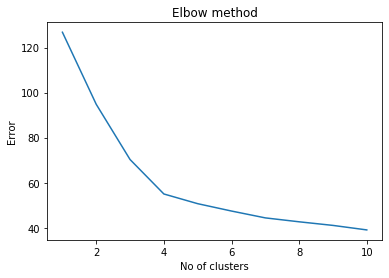

In [135]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()
#The Elbow method shows the optimal at k=4

In [136]:
kmeans4 = KMeans(n_clusters=4)
y_kmeans4 = kmeans4.fit_predict(x)
print(y_kmeans4)
#find the 4 clusters formed from the data
kmeans4.cluster_centers_
#bring labels back to original people.  Put these cluster labels in as another column.  
#Then do groupby with statistics.  Look for values to summarize the labels.
#Every row has one of these labels.  Can take the average of all of the x columns, each one.
#have another column that is the count of each

[0 2 2 0 2 0 2 0 2 2 0 0 0 0 0 1 0 0 2 2 0 0 2 2 2 0 2 0 2 2 0 2 0 0 2 0 0
 2 0 2 0 2 2 0 0 0 2 2 2 0 1 2 1 2 2 2 2 0 0 0 2 2 0 2 1 0 0 2 0 1 0 0 1 2
 2 2 2 2 2 3 2 2 2 0 2 2 2 0 2 2 2 2 0 2 0 2 0 0 0 2 0 0 0 2 2 0 0 0 2 2 0
 2 2 1 0 1 0 2 0 2 2 1 2 2 2 1 2 2 2 2 0 1 2 2 0 2 0 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 3 2 0 0 0 3 2 0 2 2 2 2 0 2 1 2 2 0 0 0 2 2 2 0 0 0 0 2 0 2 0 2 2
 2 0 2 2 0 0 2 0 0 0 2 2 0 2 2 2 2 2 2 0 0 2 0 0 2 0 0 0 2 2 0 2 2 1 3 2 2
 2 0 3 2 0 2 0 0 0 1 2 2 2 2 1 0 2 2 0 0 0 2 2 2 0 2 2 0 0 2 2 2 2 2 2 0 1
 0 0 2 2 2 2 0 0 0 0 2 0 0 0 0 2 0 0 2 0 0 2 2 2 0 0 2 2 0 3 2 0 0 0 2 2 0
 0 0 0 2 1 2 0 0 2 2 2 0 2 2 0 0 0 2 0 2 2 0 0 2 0 2 0 2 2 0 1 2 2 0 0 0 2
 2 2 0 2 2 0 2 2 0 2 0 2 2 0 2 3 2 0 2 0 2 2 2 2 0 2 2 2 2 0 1 2 2 2 2 0 0
 2 0 0 0 2 2 2 2 0 2 2 2 0 2 2 2 2 0 0 2 2 2 2 2 0 0 2 0 0 0 0 2 0 0 2 0 2
 0 0 0 1 2 2 2 2 2 0 2 2 0 0 0 0 0 0 0 1 0 0 0 0 2 2 2 0 2 2 2 2 0 0 2 2 0
 3 0 0 0 0 2 0 0 0 0 0 0 2 2 0 0 2 2 0 2 3 2 2 0 0 0 0 2 2 1 2 2 0 0 2 2 0
 2 1 2 2 2 0 2 2 0 0 0 2 

array([[0.49290954, 0.31531325, 0.04206305, 0.11369193, 0.11919315,
        0.08679707, 0.09688264, 0.07243276, 0.04623347, 0.12438875,
        0.35969412, 0.0107878 , 0.10360636],
       [0.77715517, 0.31944241, 0.02809126, 0.08189655, 0.12068966,
        0.11637931, 0.0862069 , 0.09051724, 0.04117653, 0.06465517,
        0.        , 1.        , 0.08189655],
       [0.82732274, 0.31747039, 0.03213677, 0.11033007, 0.11430318,
        0.10971883, 0.10085575, 0.07365526, 0.04598846, 0.11308068,
        0.39395728, 0.00912912, 0.05409535],
       [0.68154762, 0.3003715 , 0.04304954, 0.14285714, 1.        ,
        0.10714286, 0.11309524, 0.08333333, 0.05457689, 0.125     ,
        0.40756962, 0.0083228 , 0.0952381 ]])

https://datascience.stackexchange.com/questions/16700/confused-about-how-to-apply-kmeans-on-my-a-dataset-with-features-extracted

In [150]:
#Make a copy of DF
#df_tr = df
HasAsthma_new_tr = HasAsthma_new
#Transsform the timeOfDay to dummies
#df_tr = pd.get_dummies(df_tr, columns=['timeOfDay'])

#Standardize
#clmns = ['Wattage', 'Duration','timeOfDay_Afternoon', 'timeOfDay_Evening','timeOfDay_Morning']
#df_tr_std = stats.zscore(df_tr[clmns])
#Cluster the data
#kmeans = KMeans(n_clusters=2, random_state=0).fit(df_tr_std)
clmns = ['AgeAtSurvey','ChemicalPesticideUsedInHomePast7days','Minutes/DaySedentaryActivity', 'UseMilk>=5x/wk', 'BMI']
#labels = kmeans.labels_
labels = kmeans4.labels_

#Glue back to originaal data
#df_tr['clusters'] = labels
HasAsthma_new_tr['clusters'] = labels
#Add the column into our list
#clmns.extend(['clusters'])
clmns.extend(['clusters'])
##HasAsthma_new.columns is the list?


In [151]:
#Lets analyze the clusters
#print df_tr[clmns].groupby(['clusters']).mean()
print HasAsthma_new_tr[clmns].groupby(['clusters']).mean()

SyntaxError: invalid syntax (<ipython-input-151-aab82c3d5523>, line 3)

In [137]:
kmeans_cluster_col = HasAsthma_new.append

<function matplotlib.pyplot.legend(*args, **kwargs)>

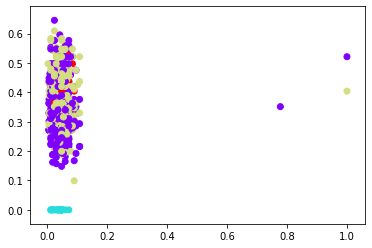

In [138]:
plt.scatter(x[:, 8], x[:, 10], c = y_kmeans4, cmap='rainbow')
# 8 = min/day sedentary activity, 10 = BMI at age 25

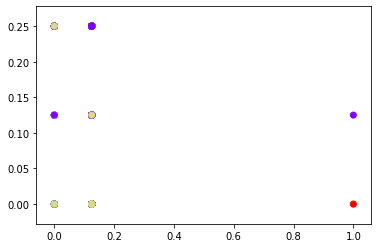

In [139]:
plt.scatter(x[:, 3], x[:, 9], c = y_kmeans4, cmap='rainbow')
# 3 = ChemicalPesticideUseIndoors past7days, 9 = UseMilk >=5x/wk

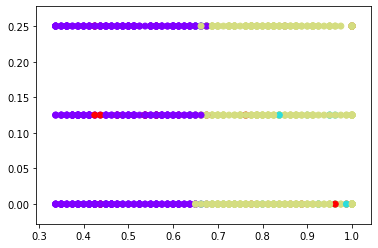

In [140]:
plt.scatter(x[:, 0], x[:, 9], c = y_kmeans4, cmap='rainbow')
# 0 = current age     9 = UseMilk >=5x/wk

In [141]:
#https://stackabuse.com/k-means-clustering-with-scikit-learn/

Apply K-Means clustering on all records to get groups/clusters and analyze each group.
Lets say you create 5 clusters from your data. K-Means will give cluster labels to each record.
Now you filter data for each label separately and analyze each column. For example How many Asthma and Non Asthma people in cluster 1? If Asthma people are leading in this cluster then what is the min/max BMI in cluster 1? Do this for other columns and try to proof your hypothesis.
Do the same thing for clusters 2, 3, 4 and 5 and see if they are showing different statistics and story.
Then you can conclude that how Machine Learning technique (K-Means) can help segmenting and grouping people who have Asthma and provide safe/dangerous levels for those columns/features/attributes/observations

In [ ]:
#This can be used for a separate study on children
#'PAQ677' : 'Past7DaysCardio20Minutes+'
#'PAQ678' : 'Past7DaysStrengthTone20Minutes+'
#'PAQ706' : 'Past7DaysCardio60Minutes+'
#**Exercise conversion to be counted at yes if indicated 3 or more days that week**
#old value(string) into new value(integer)  #1 == "yes"
#df.loc[(df['Past7DaysCardio20Minutes+'] >=3) & (df['Past7DaysCardio20Minutes+'] <=7),'Past7DaysCardio20Minutes+'] = 1
#df.loc[(df['Past7DaysStrengthTone20Minutes+'] >=3) & (df['Past7DaysStrengthTone20Minutes+'] <=7),'Past7DaysStrengthTone20Minutes+'] = 1
#df.loc[(df['Past7DaysCardio60Minutes+'] >=3) & (df['Past7DaysCardio60Minutes+'] <=7),'Past7DaysCardio60Minutes+'] = 1